<a href="https://colab.research.google.com/github/s4226/ML-python/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# mnist 手寫數字辨識資料集
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print('train data', len(x_train))
print('test data', len(x_test))

train data 60000
test data 10000


In [9]:
# 每張相素為28*28
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

x_train: (60000, 28, 28)
y_train: (60000,)


In [10]:
import matplotlib.pyplot as plt
def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap='binary')
  plt.show()

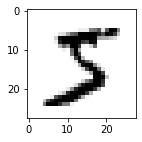

In [11]:
plot_image(x_train[0])

In [12]:
# reshape 重新改變維度 astype 改變資料類型
x_train= x_train.reshape(60000,784).astype('float32')
x_test= x_test.reshape(10000,784).astype('float32')

In [13]:
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [14]:
x_train= x_train/255
x_test= x_test/255

In [15]:
from keras.utils import np_utils
# y值轉成 one-hot encoding
y_train= np_utils.to_categorical(y_train)

In [16]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
from keras.models import  Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256, input_dim=784, activation='relu'))
# 使用 softmax activation function ，將結果分成10類
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
# 200960 = 784*256+256
# 2570 = 256*10+10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# 分類問題 -> cross entropy  optimizer -> adam演算法 
# 抽出20%資料做驗證資料 8:2
# accuracy -> training 正確率 val_accuracy -> 驗證資料 正確率
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history= model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=12, batch_size=128, verbose=2)

Epoch 1/12
375/375 - 2s - loss: 0.3454 - accuracy: 0.9035 - val_loss: 0.1812 - val_accuracy: 0.9487
Epoch 2/12
375/375 - 2s - loss: 0.1484 - accuracy: 0.9584 - val_loss: 0.1297 - val_accuracy: 0.9632
Epoch 3/12
375/375 - 2s - loss: 0.1027 - accuracy: 0.9706 - val_loss: 0.1133 - val_accuracy: 0.9670
Epoch 4/12
375/375 - 2s - loss: 0.0771 - accuracy: 0.9782 - val_loss: 0.0998 - val_accuracy: 0.9711
Epoch 5/12
375/375 - 2s - loss: 0.0594 - accuracy: 0.9833 - val_loss: 0.0905 - val_accuracy: 0.9731
Epoch 6/12
375/375 - 2s - loss: 0.0461 - accuracy: 0.9872 - val_loss: 0.0896 - val_accuracy: 0.9738
Epoch 7/12
375/375 - 2s - loss: 0.0378 - accuracy: 0.9899 - val_loss: 0.0835 - val_accuracy: 0.9750
Epoch 8/12
375/375 - 2s - loss: 0.0295 - accuracy: 0.9925 - val_loss: 0.0829 - val_accuracy: 0.9762
Epoch 9/12
375/375 - 2s - loss: 0.0233 - accuracy: 0.9942 - val_loss: 0.0780 - val_accuracy: 0.9771
Epoch 10/12
375/375 - 2s - loss: 0.0187 - accuracy: 0.9959 - val_loss: 0.0846 - val_accuracy: 0.9764

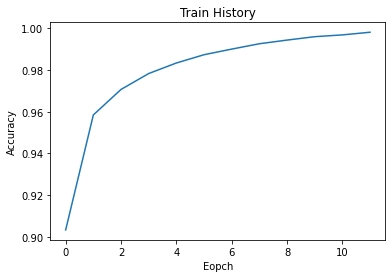

In [19]:
plt.plot(train_history.history['accuracy'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Eopch')
plt.show()

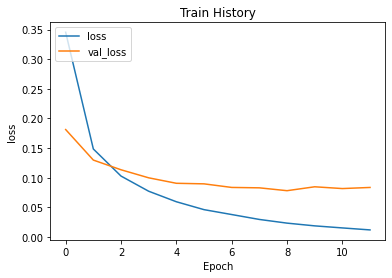

In [20]:
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [21]:
print(train_history.history)

{'loss': [0.34539929032325745, 0.14842133224010468, 0.10273627936840057, 0.0771254375576973, 0.059385523200035095, 0.04605554789304733, 0.03780842199921608, 0.029521843418478966, 0.02330898866057396, 0.01869339309632778, 0.015221279114484787, 0.01185416430234909], 'accuracy': [0.9034583568572998, 0.9584375023841858, 0.9706249833106995, 0.9782291650772095, 0.9832708239555359, 0.9872291684150696, 0.9899166822433472, 0.992479145526886, 0.9942291378974915, 0.9958541393280029, 0.996708333492279, 0.9979791641235352], 'val_loss': [0.18121013045310974, 0.1297021359205246, 0.11334404349327087, 0.0997696965932846, 0.090540312230587, 0.08957978338003159, 0.08353995531797409, 0.08285848796367645, 0.07804658263921738, 0.08462940156459808, 0.08163215965032578, 0.0835043415427208], 'val_accuracy': [0.9486666917800903, 0.9631666541099548, 0.9670000076293945, 0.9710833430290222, 0.9730833172798157, 0.9738333225250244, 0.9750000238418579, 0.9761666655540466, 0.9770833253860474, 0.9764166474342346, 0.977

In [23]:
# 混淆矩陣 Confusion matrix
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,1,1,0,0,2,1,1,1
1,0,1122,4,0,0,1,2,0,6,0
2,7,2,1005,1,1,0,2,5,9,0
3,0,1,6,966,0,20,0,5,7,5
4,1,0,2,1,961,0,2,1,2,12
5,2,0,0,2,1,881,2,0,3,1
6,7,2,1,1,3,9,934,0,1,0
7,1,4,5,1,0,0,0,1004,4,9
8,6,0,1,3,0,1,2,2,954,5


In [24]:
y_test = np_utils.to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test,verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9784
Test loss: 0.06956961005926132
Test accuracy: 0.9783999919891357
